In [1]:
from IPython.display import display
import spot
from spot.jupyter import display_inline
spot.setup(show_default='.tvb')
from product import async_prod

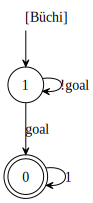

In [2]:
# System specification
aut_sys = spot.translate('F(goal)', 'Buchi', 'state-based', 'complete'); aut_sys.show("v")

In [3]:
# How to get rid of the redundant transition-based acceptance label from state 0 to 2?
print(aut_sys.to_str('hoa'))

HOA: v1
States: 2
Start: 1
AP: 1 "goal"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc complete
properties: deterministic stutter-invariant terminal
--BODY--
State: 0 {0}
[t] 0
State: 1
[0] 0
[!0] 1
--END--


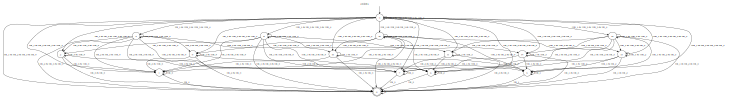

In [6]:
# Tester spec:
aut_test = spot.translate('F(int_1) & F(int_2) & F(int_3) & F(int_4)', 'Buchi', 'state-based', 'complete'); aut_test.show("v")

In [7]:
sync_prod = spot.product(aut_sys, aut_test)

In [8]:
# Patrolling car asynchronous product automaton:
# a_sys = spot.translate('F(park & F(home))', 'Buchi', 'state-based', 'complete')
# a_test = spot.translate(' G(park -> F(refuel))', 'Buchi', 'state-based', 'complete')
sync_prod = spot.product(aut_sys, aut_test)
async_prod, states_prod = async_prod(aut_sys, aut_test)
states_prod

[(1, 4, 0)]
----------------------------------
new edge in todo: (1, 4, 0)
[(0, 4, 1), (1, 0, 2), (1, 1, 3), (1, 2, 4), (1, 3, 5), (1, 5, 6), (1, 6, 7), (1, 7, 8), (1, 8, 9), (1, 9, 10), (1, 10, 11), (1, 11, 12), (1, 12, 13), (1, 13, 14), (1, 14, 15), (1, 15, 16)]
----------------------------------
new edge in todo: (1, 15, 16)
[(0, 4, 1), (1, 0, 2), (1, 1, 3), (1, 2, 4), (1, 3, 5), (1, 5, 6), (1, 6, 7), (1, 7, 8), (1, 8, 9), (1, 9, 10), (1, 10, 11), (1, 11, 12), (1, 12, 13), (1, 13, 14), (1, 14, 15), (0, 15, 17)]
----------------------------------
new edge in todo: (0, 15, 17)
[(0, 4, 1), (1, 0, 2), (1, 1, 3), (1, 2, 4), (1, 3, 5), (1, 5, 6), (1, 6, 7), (1, 7, 8), (1, 8, 9), (1, 9, 10), (1, 10, 11), (1, 11, 12), (1, 12, 13), (1, 13, 14), (1, 14, 15), (0, 0, 18), (0, 1, 19), (0, 5, 20)]
----------------------------------
new edge in todo: (0, 5, 20)
[(0, 4, 1), (1, 0, 2), (1, 1, 3), (1, 2, 4), (1, 3, 5), (1, 5, 6), (1, 6, 7), (1, 7, 8), (1, 8, 9), (1, 9, 10), (1, 10, 11), (1, 11, 12), 

{(1, 4): 0,
 (0, 4): 1,
 (1, 0): 2,
 (1, 1): 3,
 (1, 2): 4,
 (1, 3): 5,
 (1, 5): 6,
 (1, 6): 7,
 (1, 7): 8,
 (1, 8): 9,
 (1, 9): 10,
 (1, 10): 11,
 (1, 11): 12,
 (1, 12): 13,
 (1, 13): 14,
 (1, 14): 15,
 (1, 15): 16,
 (0, 15): 17,
 (0, 0): 18,
 (0, 1): 19,
 (0, 5): 20,
 (0, 14): 21,
 (0, 7): 22,
 (0, 13): 23,
 (0, 6): 24,
 (0, 12): 25,
 (0, 11): 26,
 (0, 10): 27,
 (0, 9): 28,
 (0, 8): 29,
 (0, 2): 30,
 (0, 3): 31}

In [9]:
print(sync_prod.to_str('hoa'))

HOA: v1
States: 32
Start: 0
AP: 5 "goal" "int_1" "int_2" "int_3" "int_4"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc complete
properties: deterministic stutter-invariant terminal
--BODY--
State: 0
[0&1&2&3&4] 1
[0&1&2&3&!4] 2
[0&1&2&!3&!4] 3
[0&1&!2&!3&!4] 4
[0&!1&!2&!3&!4] 5
[0&!1&2&3&4] 6
[0&1&!2&3&4] 7
[0&1&2&!3&4] 8
[0&!1&2&!3&!4] 9
[0&1&!2&3&!4] 10
[0&!1&!2&3&!4] 11
[0&1&!2&!3&4] 12
[0&!1&!2&!3&4] 13
[0&!1&!2&3&4] 14
[0&!1&2&!3&4] 15
[0&!1&2&3&!4] 16
[!0&1&2&3&4] 17
[!0&1&2&3&!4] 18
[!0&1&2&!3&!4] 19
[!0&1&!2&!3&!4] 20
[!0&!1&!2&!3&!4] 0
[!0&!1&2&3&4] 21
[!0&1&!2&3&4] 22
[!0&1&2&!3&4] 23
[!0&!1&2&!3&!4] 24
[!0&1&!2&3&!4] 25
[!0&!1&!2&3&!4] 26
[!0&1&!2&!3&4] 27
[!0&!1&!2&!3&4] 28
[!0&!1&!2&3&4] 29
[!0&!1&2&!3&4] 30
[!0&!1&2&3&!4] 31
State: 1 {0}
[t] 1
State: 2
[4] 1
[!4] 2
State: 3
[3&4] 1
[3&!4] 2
[!3&!4] 3
[!3&4] 8
State: 4
[2&3&4] 1
[2&3&!4] 2
[2&!3&!4] 3
[!2&!3&!4] 4
[!2&3&4] 7
[2&!3&4] 8
[!2&3&!4] 10
[!2&!3&4] 12
State: 5
[1&2&3&4] 1